In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Import TensorFlow and Keras for model building and training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
# Define the path to the dataset
dataset_path = r"C:\Users\KIIT0001\Downloads\archive (6)"  # Update this path to your dataset location

# Load the dataset into a structured numpy array
dataset_faces = []
for person in range(1, 41):
    temp = []
    for pose in range(1, 11):
        image_path = f'{dataset_path}/s{person}/{pose}.pgm'
        image = plt.imread(image_path)
        temp.append(image)
    dataset_faces.append(np.array(temp))
dataset_faces = np.array(dataset_faces)

# Print the dataset information
print('Total number of datasets:', len(dataset_faces))
print('Dataset size:', dataset_faces.shape)

Total number of datasets: 40
Dataset size: (40, 10, 112, 92)


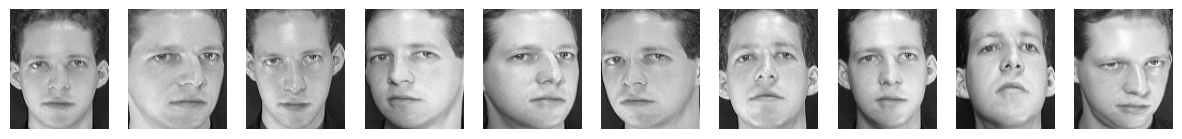

In [4]:
def plot_images(images, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Plot images from the first subject to get a sense of the data
plot_images(dataset_faces[0])

In [5]:
num_subjects, num_images_per_subject, height, width = dataset_faces.shape
X = dataset_faces.reshape(num_subjects * num_images_per_subject, height, width, 1)  # Adding channel dimension
y = np.repeat(np.arange(num_subjects), num_images_per_subject)

# Split the dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [6]:
# Normalize pixel values for model input
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_subjects)
y_test = to_categorical(y_test, num_subjects)
y_val = to_categorical(y_val, num_subjects)

In [6]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(height, width, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_subjects, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 718ms/step - accuracy: 0.0304 - loss: 3.6879 - val_accuracy: 0.0000e+00 - val_loss: 3.7073
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 625ms/step - accuracy: 0.0458 - loss: 3.6855 - val_accuracy: 0.0000e+00 - val_loss: 3.7148
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 677ms/step - accuracy: 0.0321 - loss: 3.6774 - val_accuracy: 0.0000e+00 - val_loss: 3.7191
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 588ms/step - accuracy: 0.0221 - loss: 3.6627 - val_accuracy: 0.0000e+00 - val_loss: 3.7239
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 596ms/step - accuracy: 0.0375 - loss: 3.6464 - val_accuracy: 0.0000e+00 - val_loss: 3.7379
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 586ms/step - accuracy: 0.0357 - loss: 3.6799 - val_accuracy: 0.0000e+00 - val_loss: 3.7345
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 611ms/step - accuracy: 0.0491 - loss: 3.6282 - val_accuracy: 0.0125 - val_loss: 3.7247
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 630ms/step - accuracy: 0.0354 - loss: 3.6315 - 

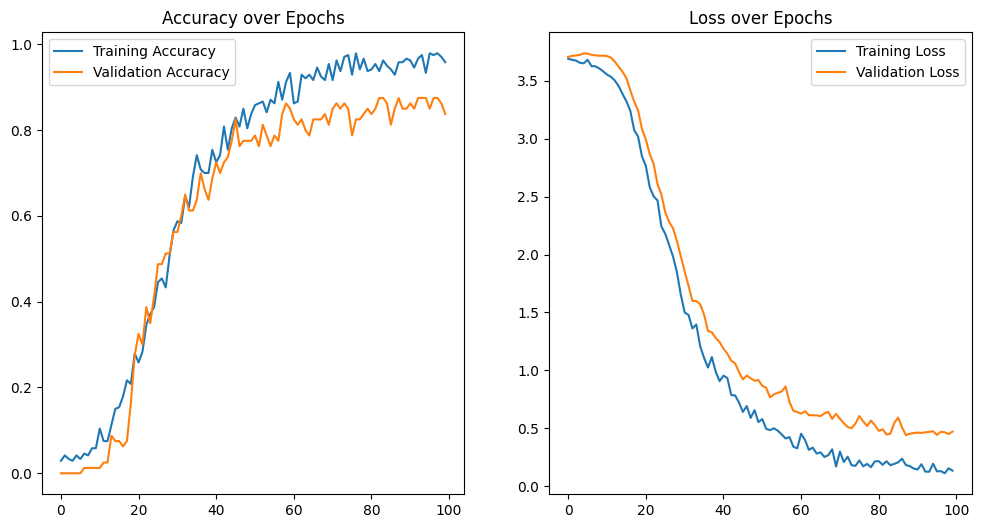

In [8]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8938 - loss: 0.3927
Test accuracy: 0.9125000238418579


In [16]:
import numpy as np
from sklearn.metrics import classification_report

# Check if y_test is one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Check if y_pred_classes is one-hot encoded
if len(y_pred_classes.shape) > 1 and y_pred_classes.shape[1] > 1:
    y_pred_classes = np.argmax(y_pred_classes, axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         2
          13       0.50      1.00      0.67         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
    

c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [17]:
print("Precision_Score: ",precision_score(y_test, y_pred_classes,average='weighted'))
print("Recall_Score: ",recall_score(y_test, y_pred_classes,average='weighted'))
print("F1_Score: ",f1_score(y_test, y_pred_classes,average='weighted'))

Precision_Score:  0.925
Recall_Score:  0.9125
F1_Score:  0.9054761904761905


c:\Users\KIIT0001\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


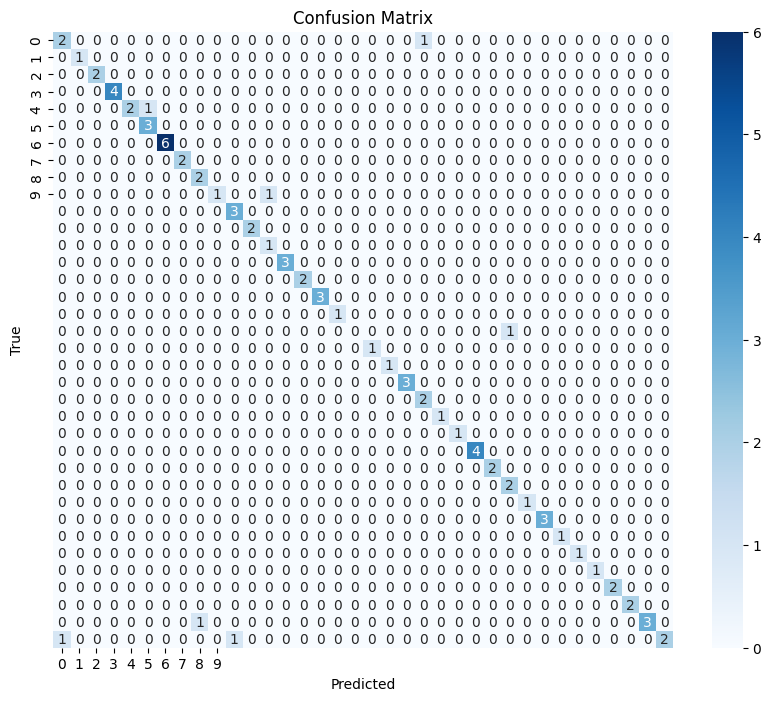

In [18]:
import seaborn as sns
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()